In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = '/content/youtube-top-100-songs-2025.csv'

df = pd.read_csv(data, header=None)

In [6]:
# view dimensions of dataset

df.shape

(101, 13)

In [7]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [10]:
col_names = ['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags', 'duration', 'duration_string', 'live_status', 'thumbnail', 'channel', 'channel_url', 'channel_follower_count']

df.columns = col_names

df.columns

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')

In [11]:
# let's again preview the dataset

df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [12]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   101 non-null    object
 1   fulltitle               101 non-null    object
 2   description             101 non-null    object
 3   view_count              101 non-null    object
 4   categories              101 non-null    object
 5   tags                    86 non-null     object
 6   duration                101 non-null    object
 7   duration_string         101 non-null    object
 8   live_status             101 non-null    object
 9   thumbnail               101 non-null    object
 10  channel                 101 non-null    object
 11  channel_url             101 non-null    object
 12  channel_follower_count  101 non-null    object
dtypes: object(13)
memory usage: 10.4+ KB


In [13]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 13 categorical variables

The categorical variables are :

 ['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags', 'duration', 'duration_string', 'live_status', 'thumbnail', 'channel', 'channel_url', 'channel_follower_count']


In [14]:
# view the categorical variables

df[categorical].head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [15]:
# check missing values in categorical variables

df[categorical].isnull().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,15
duration,0
duration_string,0
live_status,0
thumbnail,0


In [16]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

title
title                                                                                   1
ROSÉ & Bruno Mars - APT. (Official Music Video)                                        1
Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)                         1
Reneé Rapp - Leave Me Alone (Official Music Video)                                      1
Billie Eilish - BIRDS OF A FEATHER (Official Music Video)                               1
                                                                                       ..
Ariana Grande - twilight zone (Official Lyric Video)                                    1
Gracie Abrams - I Love You, I’m Sorry (Official Music Video)                            1
HoodTrophy Bino ft. FCG Heem - Miami (Official Music Video)                             1
Sean Paul x INNA - Let It Talk To Me                                                    1
Selena Gomez, benny blanco - How Does It Feel To Be Forgotten (Official Lyric Video)    1
Name

In [17]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [18]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

title
title                                                                                   0.009901
ROSÉ & Bruno Mars - APT. (Official Music Video)                                        0.009901
Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)                         0.009901
Reneé Rapp - Leave Me Alone (Official Music Video)                                      0.009901
Billie Eilish - BIRDS OF A FEATHER (Official Music Video)                               0.009901
                                                                                          ...   
Ariana Grande - twilight zone (Official Lyric Video)                                    0.009901
Gracie Abrams - I Love You, I’m Sorry (Official Music Video)                            0.009901
HoodTrophy Bino ft. FCG Heem - Miami (Official Music Video)                             0.009901
Sean Paul x INNA - Let It Talk To Me                                                    0.009901
Selena Gomez, benny blan

In [19]:
# check labels in workclass variable

df.workclass.unique()

AttributeError: 'DataFrame' object has no attribute 'workclass'

In [20]:
df['categories'].unique()

array(['categories', 'Music', 'People & Blogs'], dtype=object)

In [22]:
df['categories'].value_counts()

,count
categories,
Music,94
People & Blogs,6
categories,1


In [27]:
df['workclass'].replace('?', np.NaN, inplace=True)

KeyError: 'workclass'

In [29]:
df['channel'].unique()

array(['channel', 'ROSÉ', 'Lady Gaga', 'Reneé Rapp', 'Billie Eilish',
       'Sabrina Carpenter', 'Ed Sheeran', 'yung kai', 'Zillionaire Doe ',
       'Alex Warren', 'Kendrick Lamar', 'Shaboozey', 'LLOUD Official',
       "C'zah", 'Lola Young', 'Teddy Swims', 'JENNIE',
       'S.M.I.R Seattle Music Is Real', 'Tommy Richman', 'Doechii',
       'keinemusik', 'NIICKII', 'Post Malone', 'Gracie Abrams', 'Chxnny',
       'Sevdaliza', 'Myles Smith', 'ROLE MODEL', 'Chappell Roan', 'PJ',
       'sombr', 'Jackson Wang', 'David Guetta', 'The Weeknd', 'RAAHiiM',
       'Drake', 'Tate McRae', 'GIVĒON', 'Benson Boone', 'Charli xcx',
       'Roy Woods', 'Maroon 5', 'Dean Lewis', 'Taylor Swift',
       'Vex Prince', 'd4vd', 'Damiano David', 'DGB Media', 'SHOOP',
       'Miley Cyrus', 'Ravyn Lenae', 'Claudia Valentina', 'Tyla',
       'Coldplay', 'Insãne Shinobi', 'ImagineDragons', 'Justin Bieber',
       'Dua Lipa', 'Addison Rae', 'RyanCollinsVEVO', 'keshi',
       'Ariana Grande', 'Maz Univerze', 'Se

In [24]:
print(df.columns)

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


In [30]:
df.occupation.unique()

AttributeError: 'DataFrame' object has no attribute 'occupation'

In [31]:
df['channel_follower_count'].unique()

array(['channel_follower_count', '19200000', '29600000', '408000',
       '56800000', '12300000', '58500000', '1220000', '142000', '4050000',
       '19700000', '955000', '8080000', '1320', '565000', '6070000',
       '16100000', '14800', '655000', '3140000', '255000', '47',
       '28400000', '1770000', '3630', '1230000', '391000', '360000',
       '2250000', '32000', '616000', '5350000', '27600000', '38700000',
       '16100', '31500000', '6320000', '3330000', '5360000', '3900000',
       '297000', '37800000', '2680000', '61500000', '6100', '2220000',
       '514000', '605000', '43', '19900000', '203000', '23900', '5070000',
       '28100000', '1200', '32900000', '76200000', '24400000', '4350000',
       '1', '1900000', '56400000', '2120', '35500000', '20300', '5200000'],
      dtype=object)

In [32]:
df.occupation.value_counts()

AttributeError: 'DataFrame' object has no attribute 'occupation'

In [33]:
df = df.iloc[1:].copy()
display(df.head())

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
5,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [35]:
print(df.columns)

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


In [40]:
df.native_country.value_counts()

AttributeError: 'DataFrame' object has no attribute 'native_country'

In [42]:
df['channel_follower_count'].value_counts()

,count
channel_follower_count,
12300000,7
6320000,4
19200000,3
56800000,3
29600000,3
...,...
4350000,1
1900000,1
2120,1


In [44]:
df['channel_follower_count'].replace('?', np.nan, inplace=True)

In [45]:
df.channel_follower_count.value_counts()

,count
channel_follower_count,
12300000,7
6320000,4
19200000,3
56800000,3
29600000,3
...,...
4350000,1
1900000,1
2120,1


In [46]:
df[categorical].isnull().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,15
duration,0
duration_string,0
live_status,0
thumbnail,0


In [47]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

title  contains  100  labels
fulltitle  contains  100  labels
description  contains  100  labels
view_count  contains  100  labels
categories  contains  2  labels
tags  contains  77  labels
duration  contains  69  labels
duration_string  contains  69  labels
live_status  contains  1  labels
thumbnail  contains  100  labels
channel  contains  65  labels
channel_url  contains  69  labels
channel_follower_count  contains  65  labels


In [48]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 0 numerical variables

The numerical variables are : []


In [49]:
df[numerical].head()

""
1
2
3
4
5


In [50]:
df[numerical].isnull().sum()

,0


In [52]:
print(df.columns)

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


In [56]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [54]:
# Convert 'view_count' and 'channel_follower_count' to numeric, coercing errors to NaN
df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
df['channel_follower_count'] = pd.to_numeric(df['channel_follower_count'], errors='coerce')

# Define features (X) and target (y)
# Dropping columns that are unlikely to be useful features or are the target variable
X = df.drop(['view_count', 'fulltitle', 'description', 'thumbnail', 'channel_url'], axis=1)
y = df['view_count']

In [57]:
X_train.shape, X_test.shape

((70, 8), (30, 8))

In [58]:
# check data types in X_train

X_train.dtypes

,0
title,object
categories,object
tags,object
duration,object
duration_string,object
live_status,object
channel,object
channel_follower_count,int64


In [59]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['title',
 'categories',
 'tags',
 'duration',
 'duration_string',
 'live_status',
 'channel']

In [60]:
X_train[categorical].isnull().mean()

,0
title,0.000000
categories,0.000000
tags,0.171429
duration,0.000000
duration_string,0.000000
live_status,0.000000
channel,0.000000


In [61]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

tags 0.17142857142857143


In [63]:
for df2 in [X_train, X_test]:
    df2['tags'].fillna(X_train['tags'].mode()[0], inplace=True)

In [64]:
X_train[categorical].isnull().sum()

,0
title,0
categories,0
tags,0
duration,0
duration_string,0
live_status,0
channel,0


In [65]:
X_test[categorical].isnull().sum()

,0
title,0
categories,0
tags,0
duration,0
duration_string,0
live_status,0
channel,0


In [66]:
X_train.isnull().sum()

,0
title,0
categories,0
tags,0
duration,0
duration_string,0
live_status,0
channel,0
channel_follower_count,0


In [67]:
X_test.isnull().sum()

,0
title,0
categories,0
tags,0
duration,0
duration_string,0
live_status,0
channel,0
channel_follower_count,0


In [68]:
categorical

['title',
 'categories',
 'tags',
 'duration',
 'duration_string',
 'live_status',
 'channel']

In [69]:
X_train[categorical].head()

,title,categories,tags,duration,duration_string,live_status,channel
61,Tate McRae - Revolving door (Official Video),Music,Sports car;tate mcrae sports car;tate mcrae ki...,235,3:55,False,Tate McRae
81,Justin Bieber - DAISIES (Audio),Music,Justin Bieber;Justin Bieber 2021 PS/ Def Jam;Pop,176,2:56,False,Justin Bieber
91,Ariana Grande - intro (end of the world) (exte...,Music,Ariana Grande;Republic Records;Pop,161,2:41,False,Ariana Grande
69,Miley Cyrus - End of the World (Official Video),Music,Miley;Something Beautiful;Miley Something Beau...,252,4:12,False,Miley Cyrus
52,GIVĒON - RATHER BE (Official Music Video),Music,giveon;like want you;new artist;epic;epic reco...,191,3:11,False,GIVĒON


In [70]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [71]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.7 MB/s eta 0:00:00


In [73]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['title', 'categories', 'tags', 'duration', 'duration_string', 'live_status', 'channel'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [74]:
X_train.head()

,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,...,channel_42,channel_43,channel_44,channel_45,channel_46,channel_47,channel_48,channel_49,channel_50,channel_follower_count
61,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6320000
81,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76200000
91,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56400000
69,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19900000
52,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3330000


In [75]:
X_train.shape

(70, 289)

In [76]:
cols = X_train.columns

In [77]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [78]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [79]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [80]:
X_train.head()

,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,...,channel_42,channel_43,channel_44,channel_45,channel_46,channel_47,channel_48,channel_49,channel_50,channel_follower_count
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.660124
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.623054
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711283
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.156608


In [81]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [82]:
y_pred = gnb.predict(X_test)

y_pred

array([  37464367,   44470482,    2113548,  147871443,   18154200,
             4637,       8687, 1324833300,   35211939,   19166284,
         30012095,  158325692,       8687, 2009014557,   21968615,
         30192542,   87005996,   29225841,    2113548,   92973980,
         30012095,  111453988,   40408980,    2113548,   23070337,
         30301956, 1324833300,   19166284,   20923612,   33919328])

In [83]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.0000


In [84]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([  30012095,   24709753,   19166284,   29225841,    3794711,
        148501523,  160421970,     125528,   37464367,  111453988,
       1324833300,  158325692,   47392334,      17943,    2113548,
        115058148,  110991682,   34415168,  118077070,  472570966,
             8687,   30192542, 2009014557,  119135427,  210275500,
         34091789,  147871443,   70965585,   80889460,   85513596,
          1198540,       6605,   33919328,   29890943,   30301956,
             1161,  236500879,   35211939,  397228595,    7826393,
         92973980,  209840684,   40322577,      66051,   16952860,
         25353734,  253618903,   21968615,     667846,   23070337,
         87005996,  112391296,   44470482,     188724,  174553002,
             4637,   30313088,  142084039,   26261465,   55388007,
         18154200,    7550110,       7805,   20923612,   40408980,
         31456772,      37164,   38500113,  108529744,   41075369])

In [85]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [86]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.0000


In [87]:
# check class distribution in test set

y_test.value_counts()

,count
view_count,
17322,1
34725855,1
2536628,1
52725607,1
46253970,1
18620923,1
12089,1
46125355,1
79002814,1


In [88]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [89]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [91]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 192712953.56666666


In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        4637       0.00      0.00      0.00       0.0
        6174       0.00      0.00      0.00       1.0
        8687       0.00      0.00      0.00       0.0
       12089       0.00      0.00      0.00       1.0
       17322       0.00      0.00      0.00       1.0
      899024       0.00      0.00      0.00       1.0
     2113548       0.00      0.00      0.00       0.0
     2536628       0.00      0.00      0.00       1.0
    16971256       0.00      0.00      0.00       1.0
    18154200       0.00      0.00      0.00       0.0
    18245315       0.00      0.00      0.00       1.0
    18620923       0.00      0.00      0.00       1.0
    19166284       0.00      0.00      0.00       0.0
    20923612       0.00      0.00      0.00       0.0
    21968615       0.00      0.00      0.00       0.0
    23070337       0.00      0.00      0.00       0.0
    28007213       0.00      0.00      0.00       1.0
    29225841       0.00    

In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : nan


In [95]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : nan


In [96]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : nan


In [97]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


In [98]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : nan


In [99]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


In [100]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


In [101]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+00

In [103]:
# # store the probabilities in dataframe
#
# y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
#
# y_pred_prob_df

In [104]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [105]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

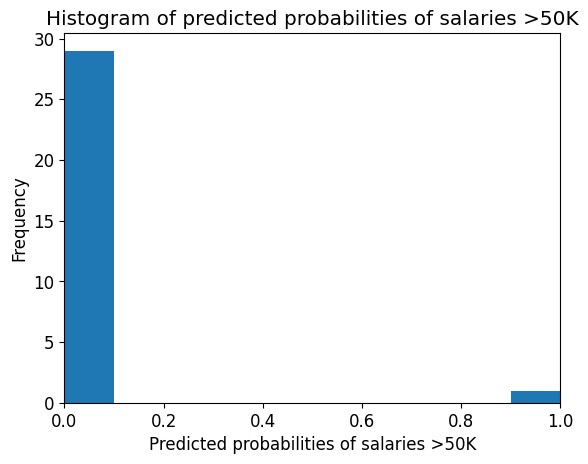

In [106]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

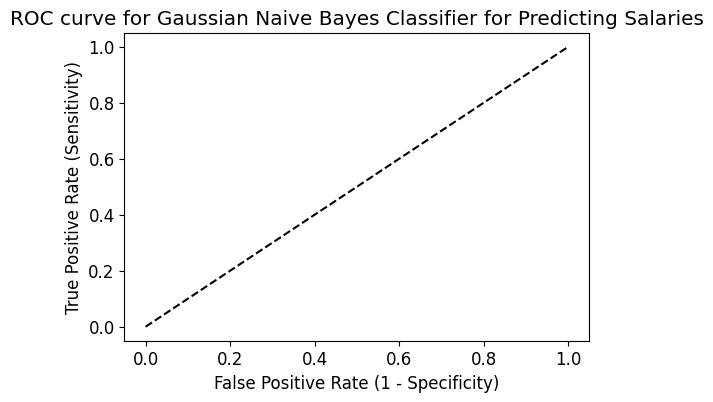

In [107]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [108]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ValueError: multi_class must be in ('ovo', 'ovr')

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 2.087517448755603e+17
Root Mean Squared Error (RMSE): 456893581.5652922


In [110]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [111]:
# import Linear Regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred_linreg = linreg.predict(X_test)

In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='r2')

print('Cross-validation R2 scores:', scores)
print('Average cross-validation R2 score: {:.4f}'.format(scores.mean()))

Cross-validation R2 scores: [-0.01408054 -0.08956045 -0.16880951 -2.30852638 -4.81617689]
Average cross-validation R2 score: -1.4794
